### Pareto Teams - Graph Costs (Diameter, Sum of Pairwise Distances)

In [1]:
from paretoGraph import *
from utils import *
import matplotlib.cm as cm

### IMDB

In [2]:
imdb_experts, imdb_tasks, imdb_costs, imdb_graphmat = import_pickled_datasets('imdb', 3)

2025-11-06 15:43:47,495 |INFO: Imported imdb experts, Num Experts: 1000
2025-11-06 15:43:47,497 |INFO: Imported imdb tasks, Num Tasks: 300
2025-11-06 15:43:47,498 |INFO: Imported imdb costs, Num Costs: 1000
2025-11-06 15:43:47,510 |INFO: Imported imdb graph matrix, Shape: (4000, 4000)



2025-11-06 15:43:47,526 |INFO: Initialized Pareto Coverage - Graph Cost Instance, Task:[0, 3, 6, 11], Num Experts:1000, Budget=1
2025-11-06 15:43:47,614 |INFO: GreedyThresholdDiameter finished: max_coverage=1.000, runtime=0.088s
2025-11-06 15:43:47,620 |INFO: Initialized Pareto Coverage - Graph Cost Instance, Task:[0, 2, 6, 7, 9, 10, 11], Num Experts:1000, Budget=1
2025-11-06 15:43:47,690 |INFO: GreedyThresholdDiameter finished: max_coverage=1.000, runtime=0.069s
2025-11-06 15:43:47,693 |INFO: Initialized Pareto Coverage - Graph Cost Instance, Task:[0, 2, 6, 7, 10, 11], Num Experts:1000, Budget=1
2025-11-06 15:43:47,734 |INFO: GreedyThresholdDiameter finished: max_coverage=1.000, runtime=0.041s
2025-11-06 15:43:47,737 |INFO: Initialized Pareto Coverage - Graph Cost Instance, Task:[0, 2, 7, 11, 18], Num Experts:1000, Budget=1
2025-11-06 15:43:47,778 |INFO: GreedyThresholdDiameter finished: max_coverage=1.000, runtime=0.040s
2025-11-06 15:43:47,781 |INFO: Initialized Pareto Coverage - Gr

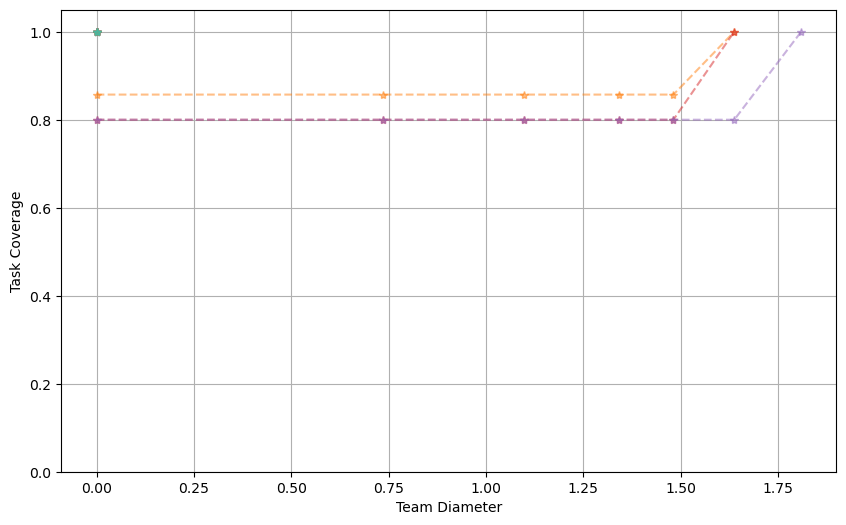

In [3]:
#run pareto_diam on mutliple tasks from bbsm
x_radii_plot, y_coverages_plot = [], []
numTasks = 20
numExperts = 1000
totalRuntime = 0

for task_index in range(50, 50+numTasks):
    pareto_diam_bbsm = paretoGraph(task=imdb_tasks[task_index], 
                                n_experts = imdb_experts[:numExperts], 
                                pairwise_costs=imdb_graphmat[:numExperts, :numExperts],
                                size_univ = 24, 
                                budget=1)

    radii, best_coverages, best_centers, best_included_lists, runTime = pareto_diam_bbsm.greedyThresholdDiameter()
    x_radii_plot.append(radii*2)
    y_coverages_plot.append(best_coverages)
    totalRuntime += runTime

logging.info(f"Average runtime per task: {totalRuntime/numTasks:.3f} seconds")

plt.figure(figsize=(10,6))
for i in range(numTasks):
    plt.plot(x_radii_plot[i], y_coverages_plot[i], marker='*', linestyle='--', alpha=0.5)

plt.ylim(0, 1.05)
plt.xlabel('Team Diameter')
plt.ylabel('Task Coverage')
plt.grid()
plt.show()

## Bibsonomy

In [4]:
bbsm_experts, bbsm_tasks, bbsm_costs, bbsm_graphmat = import_pickled_datasets('bbsm', 2)
#bbsm universe size = 75

2025-11-06 15:43:48,637 |INFO: Imported bbsm experts, Num Experts: 500
2025-11-06 15:43:48,640 |INFO: Imported bbsm tasks, Num Tasks: 300
2025-11-06 15:43:48,642 |INFO: Imported bbsm costs, Num Costs: 500
2025-11-06 15:43:48,644 |INFO: Imported bbsm graph matrix, Shape: (1500, 1500)



2025-11-06 15:44:06,895 |INFO: Initialized Pareto Coverage - Graph Cost Instance, Task:[64, 4, 9, 13, 18, 25, 58], Num Experts:50, Budget=1
2025-11-06 15:44:06,902 |INFO: GreedyThresholdDiameter finished: max_coverage=1.000, runtime=0.006s
2025-11-06 15:44:06,903 |INFO: Initialized Pareto Coverage - Graph Cost Instance, Task:[73, 9, 70, 71], Num Experts:50, Budget=1
2025-11-06 15:44:06,907 |INFO: GreedyThresholdDiameter finished: max_coverage=1.000, runtime=0.004s
2025-11-06 15:44:06,908 |INFO: Initialized Pareto Coverage - Graph Cost Instance, Task:[8, 33, 22, 30], Num Experts:50, Budget=1
2025-11-06 15:44:06,914 |INFO: GreedyThresholdDiameter finished: max_coverage=1.000, runtime=0.005s
2025-11-06 15:44:06,915 |INFO: Initialized Pareto Coverage - Graph Cost Instance, Task:[25, 20, 6, 23], Num Experts:50, Budget=1
2025-11-06 15:44:06,917 |INFO: GreedyThresholdDiameter finished: max_coverage=1.000, runtime=0.001s
2025-11-06 15:44:06,917 |INFO: Initialized Pareto Coverage - Graph Cost I

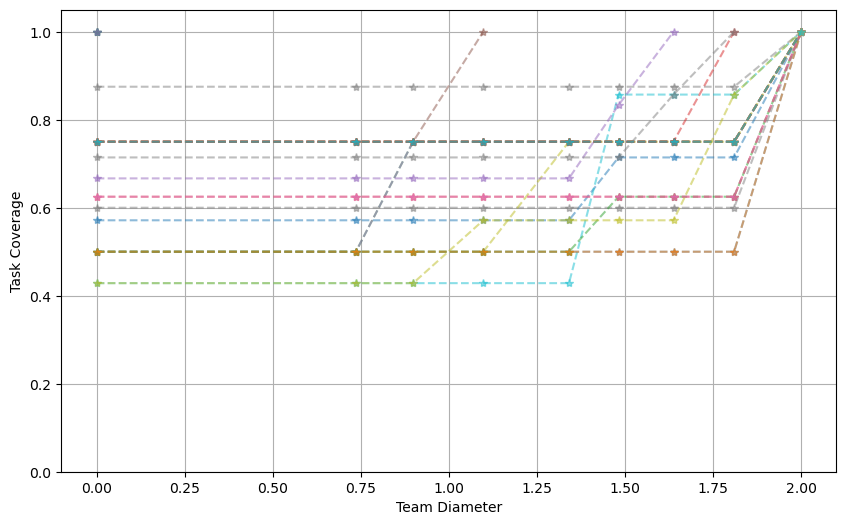

In [6]:
#run pareto_diam on mutliple tasks from bbsm
x_radii_plot, y_coverages_plot = [], []
numTasks = 30
numExperts = 50
totalRuntime = 0

for task_index in range(20, 20+numTasks):
    pareto_diam_bbsm = paretoGraph(task=bbsm_tasks[task_index], 
                                n_experts = bbsm_experts[:numExperts], 
                                pairwise_costs=bbsm_graphmat[:numExperts, :numExperts],
                                size_univ = 75, 
                                budget=1)

    radii, best_coverages, best_centers, best_included_lists, runTime = pareto_diam_bbsm.greedyThresholdDiameter()
    x_radii_plot.append(radii*2)
    y_coverages_plot.append(best_coverages)

    totalRuntime += runTime

logging.info(f"Average runtime per task: {totalRuntime/numTasks:.3f} seconds")

plt.figure(figsize=(10,6))
for i in range(numTasks):
    plt.plot(x_radii_plot[i], y_coverages_plot[i], marker='*', linestyle='--', alpha=0.5)

plt.ylim(0, 1.05)
plt.xlabel('Team Diameter')
plt.ylabel('Task Coverage')
plt.grid()
plt.show()